# Breast Cancer Project

# Lymph Node Metastasis Prediction Using miRNA Expression Data

# Feature Selection 1st Step

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import VarianceThreshold

## Import Function

In [2]:
def read_object(obj_path):
    with open(obj_path, 'rb') as input:
        return pickle.load(input)

def save_object(obj, dir_path, file_name, file_extension='pkl', create_dir=True):
    if create_dir:
        if not os.path.isdir(dir_path):
            os.makedirs(dir_path)
    name = os.path.normpath(os.path.join(dir_path, file_name+'.'+file_extension))
    with open(name, 'wb') as output:  # overwrites any existing file
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        return name

## Loading Train and Test Data Matrix and Target Vector

In [11]:
dir_path = 'F:/internship/Breast Cancer Project (Lymph Node Metastasis)(miRNA)/preprocessing/' 

file_name = 'Train Matrix.pkl'
train_matrix =read_object(dir_path+file_name)

file_name = 'Test Matrix.pkl'
test_matrix =read_object(dir_path+file_name)

file_name = 'Train Target.pkl'
train_target =read_object(dir_path+file_name)

file_name = 'Test Target.pkl'
test_target =read_object(dir_path+file_name)

dir_path = 'F:/internship/Breast Cancer Project (Lymph Node Metastasis)(miRNA)/reading_breast_cancer/'

file_name = 'miRNA ID.pkl'
miRNA_id = read_object(dir_path + file_name)

## Normalization 

In [12]:
scaler = MinMaxScaler()
scaler.fit(train_matrix)
normal_train_matrix = scaler.transform(train_matrix)
normal_test_matrix = scaler.transform(test_matrix)

## Feature Selection
## Filter Methods 
## Variance Threshold

In [13]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(normal_train_matrix)
selected_index = selector.get_support(indices=True)
selected_train_matrix = selector.transform(normal_train_matrix)
selected_test_matrix = selector.transform(normal_test_matrix)
print(selected_train_matrix.shape)
print(selected_test_matrix.shape)

(492, 650)
(123, 650)


In [9]:
selector.variances_

array([0.0226809 , 0.0227813 , 0.02260292, 0.02458195, 0.0185736 ,
       0.02412164, 0.01602463, 0.01786435, 0.03089939, 0.01917181,
       0.01646214, 0.01047153, 0.0163336 , 0.01726278, 0.02658441,
       0.03282318, 0.02867484, 0.01813369, 0.03449374, 0.03516581,
       0.02312112, 0.0279511 , 0.02380263, 0.0329785 , 0.03049007,
       0.00715224, 0.00624732, 0.03387604, 0.04232232, 0.0035056 ,
       0.00227384, 0.04447491, 0.03713102, 0.01791453, 0.00794865,
       0.00596831, 0.02312816, 0.01090411, 0.02336262, 0.02454128,
       0.04814887, 0.0276774 , 0.00992721, 0.03724006, 0.02809817,
       0.02488986, 0.01106161, 0.009344  , 0.00809077, 0.00858229,
       0.02682707, 0.00278114, 0.00318341, 0.03115344, 0.00561582,
       0.02647975, 0.02402686, 0.02986302, 0.02334534, 0.0261784 ,
       0.01221649, 0.00224063, 0.03566004, 0.01890015, 0.02087102,
       0.0098177 , 0.01359942, 0.01560312, 0.01521409, 0.01570891,
       0.0222775 , 0.01163218, 0.0105546 , 0.02304171, 0.00523

In [10]:
selected_index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  27,
        28,  31,  32,  33,  36,  37,  38,  39,  40,  41,  43,  44,  45,
        46,  50,  53,  55,  56,  57,  58,  59,  60,  62,  63,  64,  66,
        67,  68,  69,  70,  71,  72,  73,  76,  78,  79,  80,  81,  82,
        84,  85,  86,  87,  88,  89,  90,  95,  96,  97,  98,  99, 100,
       102, 103, 105, 106, 108, 109, 110, 112, 114, 115, 116, 117, 118,
       119, 120, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [14]:
selected_miRNA_id = miRNA_id[selected_index]
selected_miRNA_id.shape

(650,)

## PCA and Visualization

In [15]:
pca = PCA(n_components=2)
pca.fit(selected_train_matrix)
train_pca_matrix = pca.transform(selected_train_matrix)
test_pca_matrix = pca.transform(selected_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(492, 2)
(123, 2)


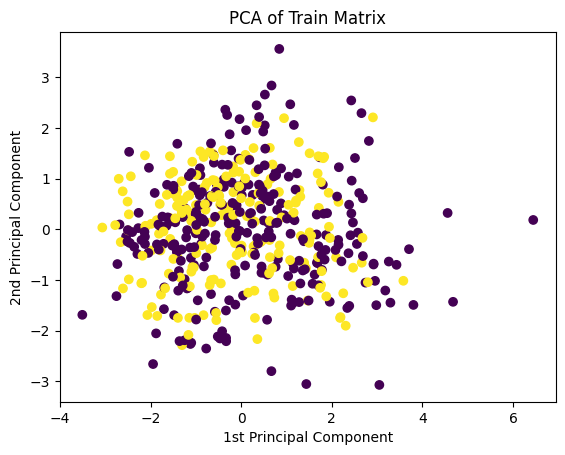

In [16]:
plt.Figure(figsize=(10,10))
fig = plt.scatter(train_pca_matrix[:,0], train_pca_matrix[:,1], c=train_target)
plt.title('PCA of Train Matrix')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

## Classifying based on the PCA Data Matrix

In [17]:
n_components = 300
pca = PCA(n_components=n_components)
pca.fit(selected_train_matrix)
train_pca_matrix = pca.transform(selected_train_matrix)
test_pca_matrix = pca.transform(selected_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(492, 300)
(123, 300)


--------------------------------------------------
Training set
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       286
           1       0.89      0.88      0.89       206

    accuracy                           0.90       492
   macro avg       0.90      0.90      0.90       492
weighted avg       0.90      0.90      0.90       492



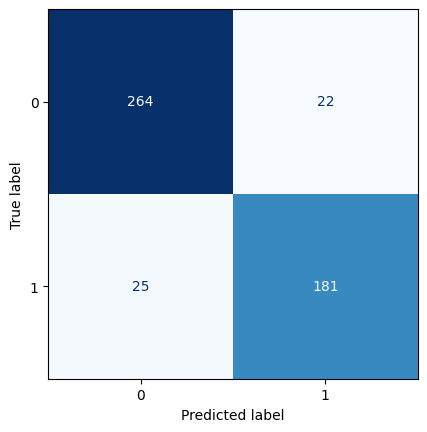

--------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.61      0.54      0.57        71
           1       0.46      0.54      0.50        52

    accuracy                           0.54       123
   macro avg       0.54      0.54      0.53       123
weighted avg       0.55      0.54      0.54       123



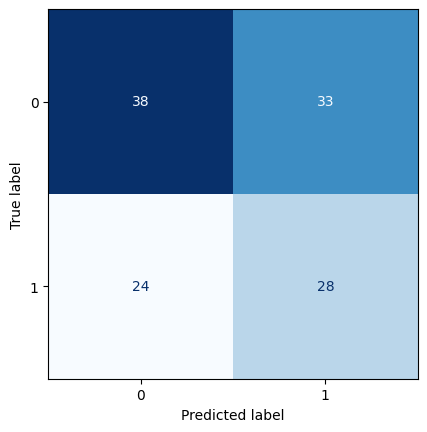

In [18]:
model = LinearDiscriminantAnalysis()
# model = QuadraticDiscriminantAnalysis()
# model = GaussianNB()
model.fit(train_pca_matrix, train_target)
train_pred = model.predict(train_pca_matrix)
test_pred = model.predict(test_pca_matrix)
print('-'*50)
print('Training set')
print(classification_report(train_target, train_pred))

ConfusionMatrixDisplay.from_predictions(train_target, train_pred, cmap='Blues', colorbar=False)
plt.show()

print('-'*50)
print('Test set')
print(classification_report(test_target, test_pred))
ConfusionMatrixDisplay.from_predictions(test_target, test_pred, cmap='Blues', colorbar=False)
plt.show()

In [20]:
dir_path = 'F:/internship/Breast Cancer Project (Lymph Node Metastasis)(miRNA)/Feature_Selection (1st step)/' 
file_name = 'Selected Features (1st step)'
save_object(selected_miRNA_id, dir_path, file_name)

'F:\\internship\\Breast Cancer Project (Lymph Node Metastasis)(miRNA)\\Feature_Selection (1st step)\\Selected Features (1st step).pkl'